In [2]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# Loading Dataset
engine_data = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Data_Analyst\Automotive_Vehicles_Engine\Dataset\cleaned_engine_data.csv')

In [3]:
engine_data["Timestamp"] = pd.to_datetime(engine_data["Timestamp"])
engine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   engine_rpm        19535 non-null  float64       
 1   lub_oil_pressure  19535 non-null  float64       
 2   fuel_pressure     19535 non-null  float64       
 3   coolant_pressure  19535 non-null  float64       
 4   lub_oil_temp      19535 non-null  float64       
 5   coolant_temp      19535 non-null  float64       
 6   engine_condition  19535 non-null  int64         
 7   temp_diff         19535 non-null  float64       
 8   pressure_ratio    19535 non-null  float64       
 9   Timestamp         19535 non-null  datetime64[ns]
 10  Hour              19535 non-null  int64         
 11  Day_of_week       19535 non-null  int64         
 12  Is_weekend        19535 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(4)
memory usage: 1.9 MB


- Distribution of Variables

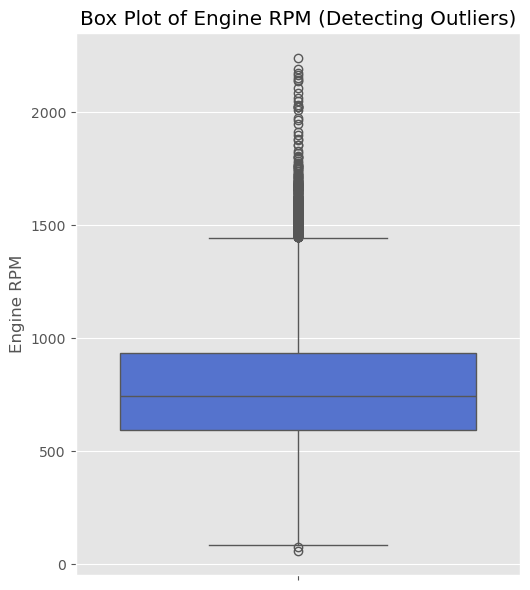

In [4]:
# Set plot style
plt.style.use("ggplot") 

# Create a figure
plt.figure(figsize=(10, 6))

# Box Plot for Outliers
plt.subplot(1, 2, 1)
sns.boxplot(y=engine_data['engine_rpm'], color="royalblue")
plt.title("Box Plot of Engine RPM (Detecting Outliers)")
plt.ylabel("Engine RPM")

# Show the plots
plt.tight_layout()
plt.show()


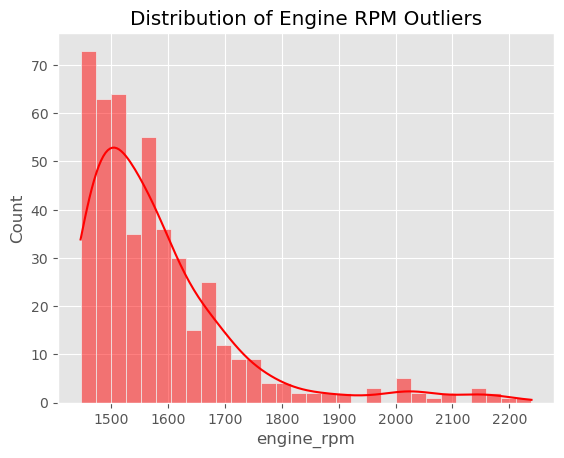

In [ ]:
# Calculate Q1, Q3, and IQR for 'engine_rpm'
Q1 = engine_data['engine_rpm'].quantile(0.25)
Q3 = engine_data['engine_rpm'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = engine_data[engine_data['engine_rpm'] > upper_bound]

# Count and percentage of outliers
num_outliers = len(outliers)
percent_outliers = (num_outliers / len(engine_data)) * 100

# Group by hour to check if outliers occur more during certain hours of the day (e.g., during startup).
engine_data.groupby('Hour')['engine_rpm'].describe()

# Use a histogram or KDE plot to see where outliers cluster.
sns.histplot(outliers['engine_rpm'], bins=30, kde=True, color='red')
plt.title('Distribution of Engine RPM Outliers')
plt.show()


- Correlation Analysis

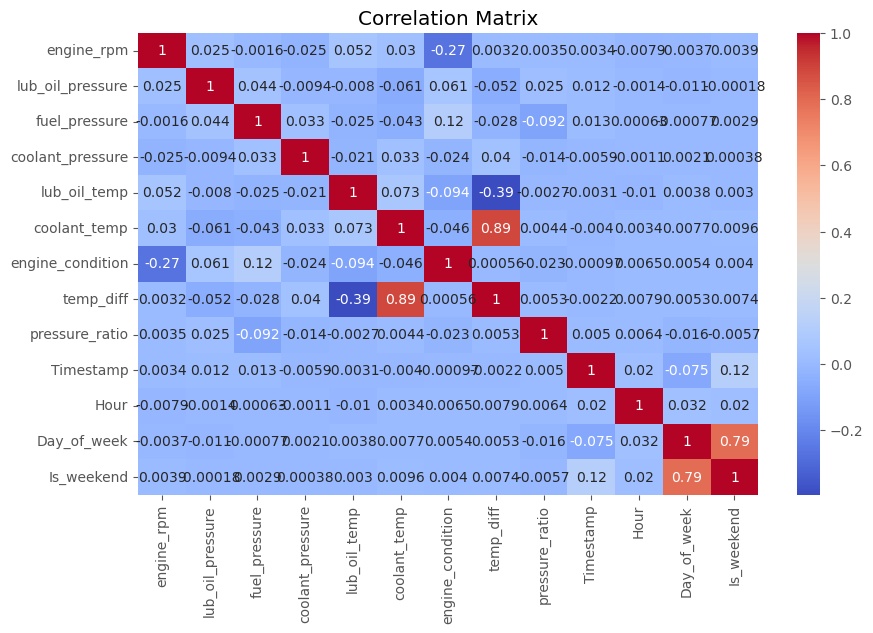

In [6]:
# Heatmap of correlations
plt.figure(figsize=(10,6))
sns.heatmap(engine_data.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


- Anomaly Detection

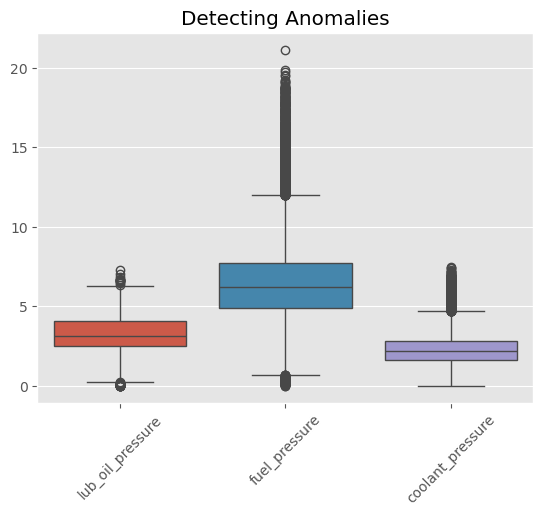

In [7]:
sns.boxplot(data=engine_data[['lub_oil_pressure', 'fuel_pressure', 'coolant_pressure']])
plt.xticks(rotation=45)
plt.title('Detecting Anomalies')
plt.show()


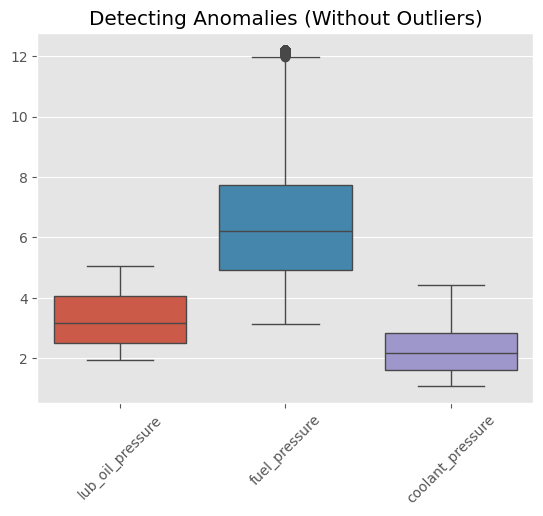

In [8]:
from scipy.stats.mstats import winsorize

engine_data['fuel_pressure'] = winsorize(engine_data['fuel_pressure'], limits=[0.05, 0.05])  # Cap extreme 5% values
engine_data['lub_oil_pressure'] = winsorize(engine_data['lub_oil_pressure'], limits=[0.05, 0.05])  # Cap extreme 5% values
engine_data['coolant_pressure'] = winsorize(engine_data['coolant_pressure'], limits=[0.05, 0.05])  # Cap extreme 5% values

sns.boxplot(data=engine_data[['lub_oil_pressure', 'fuel_pressure', 'coolant_pressure']])
plt.xticks(rotation=45)
plt.title('Detecting Anomalies (Without Outliers)')
plt.show()
